<a href="https://colab.research.google.com/github/amita-kapoor/COVID-19/blob/master/COVID_19_italy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
days = 10  # Number of days
dates = list(range(224,230))    
dates.extend(list(range(301,311)))
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200'+str(dates[0])+'.csv'
df1 = pd.read_csv(url)
for date in dates:
  url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200'+str(date)+'.csv'
  print("Reading from", url)
  df2 = pd.read_csv(url)
  df1 = pd.merge(df1, df2, how='outer' )

Reading from https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200224.csv
Reading from https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200225.csv
Reading from https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200226.csv
Reading from https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200227.csv
Reading from https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200228.csv
Reading from https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200229.csv
Reading from https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200301.csv
Reading from https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200302.csv
Reading from https://raw.githubu

In [0]:
#cols = list(df1.columns) 
#cols

In [0]:
cols = ['date','state','region_code','region_name', 'lat', 'long',  'hospitalized_with_symptoms', 'intensive_care', 'total_hospitalized',
        'home_isolation', 'total_currently_positive', 'new currently positive', 'discharged_healed', 'deceased', 'total_cases', 'swabs']
df1.columns = cols

df_final = df1.drop(['state','region_code','region_name','lat','long'], axis=1)

In [0]:
df_final = pd.pivot_table(df_final, index='date', aggfunc='sum')

In [0]:
# Adding percentage of Deceased and ICU 

df_final['deceased_percent'] = (df_final['deceased']/ df_final['total_cases'])*100
df_final['recovered_percent'] = (df_final['discharged_healed']/ df_final['total_cases'])*100
df_final['severe_percent'] = (df_final['intensive_care']/ df_final['total_cases'])*100

In [7]:
df_final.reset_index(inplace=True)
df_final['date']= pd.to_datetime(df_final['date']) 
df_final['date'] = df_final['date'].dt.date
df_final.head()

,date,deceased,discharged_healed,home_isolation,hospitalized_with_symptoms,intensive_care,new currently positive,swabs,total_cases,total_currently_positive,total_hospitalized,deceased_percent,recovered_percent,severe_percent
0,2020-02-24,7,1,94,101,26,221,4324,229,221,127,3.056769,0.436681,11.353712
1,2020-02-25,10,1,162,114,35,90,8623,322,311,150,3.105590,0.310559,10.869565
2,2020-02-26,12,3,221,128,36,74,9587,400,385,164,3.000000,0.750000,9.000000
3,2020-02-27,17,45,284,248,56,203,12014,650,588,304,2.615385,6.923077,8.615385
4,2020-02-28,21,46,412,345,64,233,15695,888,821,409,2.364865,5.180180,7.207207


(array([737480., 737482., 737484., 737485., 737487., 737489., 737491.,
        737493.]), <a list of 8 Text xticklabel objects>)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


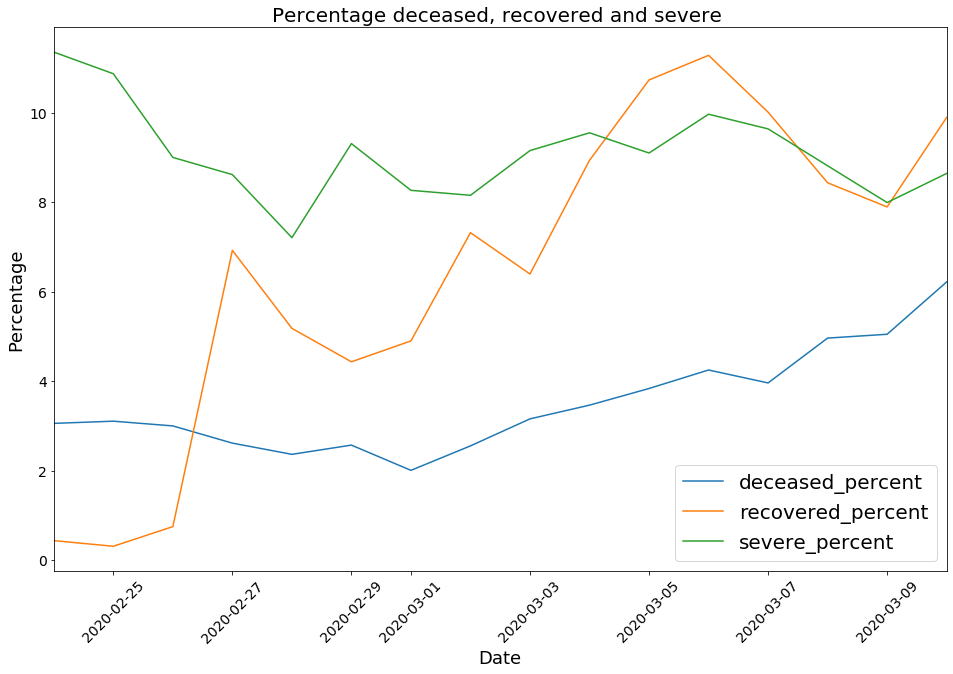

In [8]:
## Plotting the percentage
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = [16,10]
plt.rc('xtick',labelsize=14, )
plt.rc('ytick',labelsize=14)
ax = df_final.plot('date', ['deceased_percent', 'recovered_percent', 'severe_percent'])
ax.set_ylabel("Percentage", fontname="Arial", fontsize=18)
ax.set_xlabel("Date", fontname="Arial", fontsize=18)
ax.legend(loc=0, prop={'size': 20})
ax.set_title("Percentage deceased, recovered and severe ", fontsize=20)
plt.xticks(rotation=45)

In [0]:
patients_plot_eng = df_final[['hospitalized_with_symptoms', 'intensive_care', 'total_hospitalized',
        'home_isolation']]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

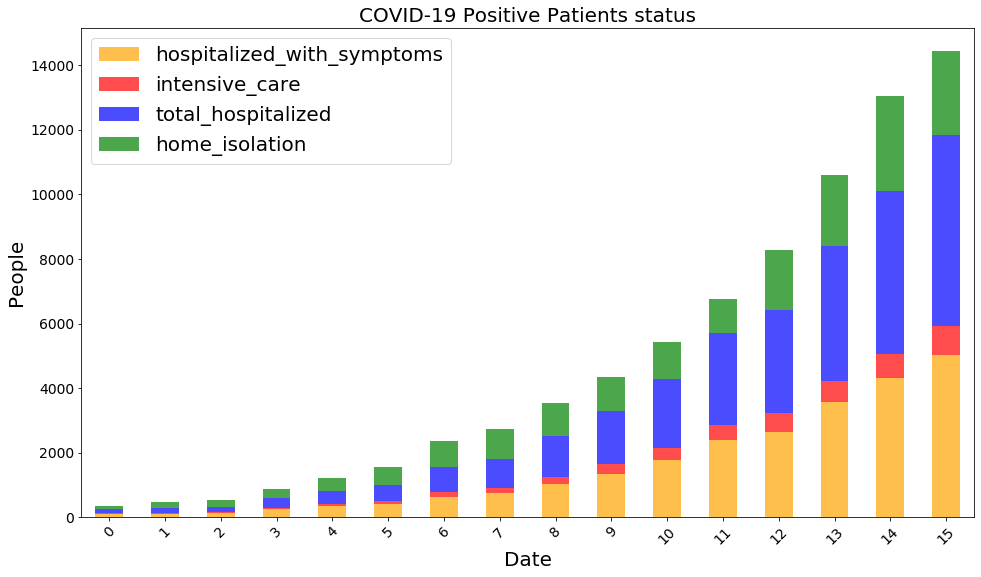

In [11]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = [16,9]
plt.rc('xtick',labelsize=14, )
plt.rc('ytick',labelsize=14)

ax = patients_plot_eng.plot.bar(stacked=True,color=['orange', 'red', 'blue', 'green', 'black'], alpha =0.7,\
                      title = "Summary of patient conditions")
ax.set_ylabel("People", fontname="Arial", fontsize=20)
ax.set_xlabel("Date", fontname="Arial", fontsize=20)
ax.legend(loc=2, prop={'size': 20})
ax.set_title("COVID-19 Positive Patients status",\
             fontname='Arial', fontsize=20)
plt.xticks(rotation=45)

# Prediction

In [12]:
from scipy.optimize import curve_fit
xdata=np.array(range(df_final.shape[0]))
ydata=df_final['total_cases'].values
popt, pcov = curve_fit(f=lambda t,a,b: a*2**(t/b),xdata=xdata,ydata=ydata)
perr = np.sqrt(np.diag(pcov))
popt, pcov, perr

(array([467.36574208,   3.31716661]), array([[1.57892251e+03, 3.97290835e+00],
        [3.97290835e+00, 1.03071277e-02]]), array([39.73565798,  0.10152403]))

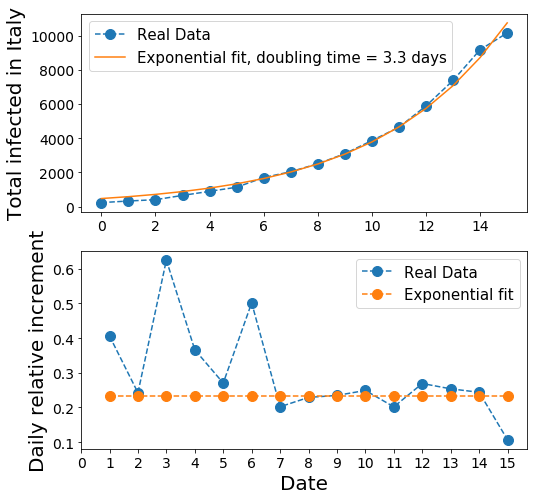

In [13]:
fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,figsize=(8,8))
perc = np.diff(ydata) / ydata[:-1]
yfit = popt[0]*2**(xdata/popt[1])
perc_fit = np.diff(yfit) / yfit[:-1]
ax1.set_ylabel('Total infected in Italy',fontsize=20)
ax1.plot(df_final['total_cases'],'--o',ms=10,label='Real Data')
ax1.plot(xdata,yfit,'-',label=f'Exponential fit, doubling time = {round(popt[1],1)} days')
ax2.plot(xdata[1:],perc,'--o',ms=10,label='Real Data')
ax2.plot(xdata[1:],perc_fit,'--o',ms=10,label='Exponential fit')
ax2.set_xticks(list(range(df_final.shape[0])))
ax2.set_xticklabels(list(df_final.index))
ax2.set_ylabel('Daily relative increment',fontsize=20)
ax2.set_xlabel('Date',fontsize=20)
ax1.legend(fontsize=15)
ax2.legend(fontsize=15)
plt.show()
